In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import plot_confusion_matrix


In [26]:
df = pd.read_csv('Documents/Univiersity/HonsProject/MachineLearningcsv/Cleanedcsv1/csvfile_4.csv')
df.isna().any


<bound method DataFrame.any of          Destination Port   Flow Duration   Total Fwd Packets  \
0                   False           False               False   
1                   False           False               False   
2                   False           False               False   
3                   False           False               False   
4                   False           False               False   
...                   ...             ...                 ...   
286462              False           False               False   
286463              False           False               False   
286464              False           False               False   
286465              False           False               False   
286466              False           False               False   

         Total Backward Packets  Total Length of Fwd Packets  \
0                         False                        False   
1                         False                        False

In [27]:
df.shape


(286467, 65)

In [28]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,1
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,1
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,1
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,1
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,1


In [3]:
samples = df.values

In [4]:
kmeans = KMeans(n_clusters=3)

In [5]:
kmeans.fit(samples)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
clusters = kmeans.cluster_centers_

In [7]:
print(clusters)

[[ 8.43608268e+03  6.46280284e+05  2.12496009e+00  1.94559214e+00
   1.26876930e+02  9.40180352e+02  5.25476826e+01  1.06075771e+01
   2.11031933e+01  1.68660160e+01  1.17274480e+02  2.81949471e+01
   5.96103236e+01  3.46963506e+01  8.25469986e+04  1.53062786e+05
   4.43283362e+05  1.12906513e+04  5.50580603e+05  1.31276935e+05
   1.46334386e+05  3.92264423e+05  4.95146912e+04  3.94960929e+05
   8.92820426e+04  6.62028109e+04  2.17960985e+05  4.86287517e+04
   1.90766995e-02  5.87267716e+01  4.68338624e+01  4.35350423e+04
   2.21917571e+04  1.03738894e+01  1.33197608e+02  3.75300048e+01
   4.32890577e+01  2.35127061e+04  9.13464891e-03  1.90766995e-02
   6.53723773e-01  1.26017051e-01  4.69650872e-02  8.68771538e-01
   4.48595343e+01  2.11031933e+01  5.96103236e+01  5.87267716e+01
   2.12496009e+00  1.26876930e+02  1.94559214e+00  9.40180352e+02
   1.09392877e+04  1.09158318e+03  8.56579773e-01  2.93020526e+01
   1.53607836e+04  3.77617436e+03  1.92118418e+04  1.29710535e+04
   2.72679

In [20]:
y_km = kmeans.fit_predict(samples)
y_km


array([0, 0, 0, ..., 0, 0, 0])

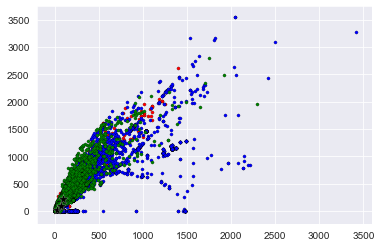

In [9]:
n = 8
m = 9

plt.scatter(samples[y_km == 0,n], samples[y_km == 0,m], s=10, edgecolors="black", linewidth=.2, color='red')
plt.scatter(samples[y_km == 1,n], samples[y_km == 1,m], s=10, edgecolors="black", linewidth=.2, color='blue')
plt.scatter(samples[y_km == 2,n], samples[y_km == 2,m], s=10, edgecolors="black", linewidth=.2, color="green")



plt.scatter(clusters[0][n], clusters[0][m], marker='*', s=100, edgecolors="white", linewidth=.2, color='black')
plt.scatter(clusters[1][n], clusters[1][m], marker='*', s=100, edgecolors="white", linewidth=.2, color='black')
plt.scatter(clusters[2][n], clusters[2][m], marker='*', s=100, edgecolors="white", linewidth=.2, color='black')


In [10]:
kmeans.inertia_

8.63619562960433e+19

In [11]:
wcss = []
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(samples)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [12]:
wcss

[5.8802177447145085e+20,
 1.5140204931798614e+20,
 8.636195547073475e+19,
 6.147420512637523e+19,
 3.746226055246356e+19,
 2.917825956424925e+19]

Text(0, 0.5, 'Within-cluster Sum of Squares - WCSS')

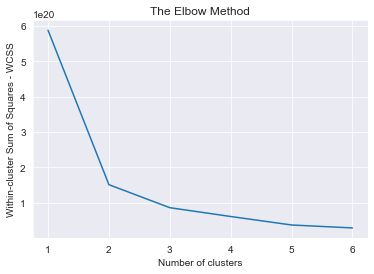

In [13]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares - WCSS')

In [14]:
samples.reshape(-1, 1)

array([[2.200000e+01],
       [1.266342e+06],
       [4.100000e+01],
       ...,
       [0.000000e+00],
       [0.000000e+00],
       [1.000000e+00]])

[[  4547      0      0]
 [     0 272479      0]
 [     0      0   9441]]


ValueError: Expected 2D array, got 1D array instead:
array=[0. 1. 2.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

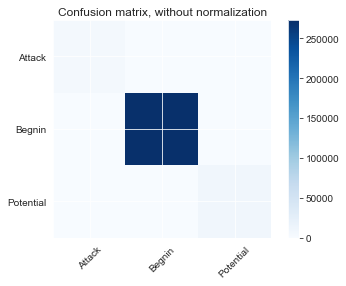

In [16]:
#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in kmeans.fit(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_km, y_km)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Attack','Begnin', 'Potential'],
                      title='Confusion matrix, without normalization')